In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chatgpt-twitter-dataset/chatgpt1.csv


In [37]:
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/chatgpt-twitter-dataset/chatgpt1.csv")

In [3]:
df.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871699456,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993806848,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926349312,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297256961,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570880,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0


In [4]:
df.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username', 'Permalink', 'User',
       'Outlinks', 'CountLinks', 'ReplyCount', 'RetweetCount', 'LikeCount',
       'QuoteCount', 'ConversationId', 'Language', 'Source', 'Media',
       'QuotedTweet', 'MentionedUsers', 'hashtag', 'hastag_counts'],
      dtype='object')

In [5]:
data1 = df[df.Language != "en"]
data2 = df[df.Language == "en"]

In [6]:
data1.shape, data2.shape

((17925, 20), (32076, 20))

In [8]:
data1.reset_index(drop=True, inplace=True)
data2.reset_index(drop=True, inplace=True)

In [12]:
#!pip install deep_translator
from deep_translator import GoogleTranslator

In [14]:
GoogleTranslator(source="auto", target="en").translate(data1.Text[1])

'Check out what @fobizz @DianaKnodel brings to the slopes ⬇️ to take you with them.\n\n@reg_schulz starts tomorrow - and on Tue at 12 we will discuss #ChatGPT as critical friends in a live briefing with SPD chairman @EskenSaskia &amp; Diana\nhttps://t.co/DsoeVJrPBp https://t.co/HflTruResk https://t.co/7tYCx6Srp8'

In [31]:
translated = []
for i in range(0,len(data1)):
    text = GoogleTranslator(source="auto", target="en").translate(data1.Text[i])
    print(i)
    translated.append(text)
print("translation done")

translation done


In [18]:
data1["Text"] = translated

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
data1

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,I forgot to play ChatGPT! !\nI want you to wri...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871699456,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:44+00:00,1617156308926349312,Check out what @fobizz @DianaKnodel brings to ...,ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926349312,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
2,2023-01-22 13:44:52+00:00,1617156345064570880,The first thing that individuals who write hom...,0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570880,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
3,2023-01-22 13:45:00+00:00,1617156376983207937,The unknown background of ChatGPT: Cheap labor...,GazeteKarinca,https://twitter.com/GazeteKarinca/status/16171...,https://twitter.com/GazeteKarinca,['https://gazetekarinca.com/chatgptnin-bilinme...,['https://t.co/daAyOpRLiM'],0,0,1,0,1617156376983207937,tr,"<a href=""https://about.twitter.com/products/tw...",NaN,NaN,NaN,[],0
4,2023-01-22 13:45:10+00:00,1617156421719838721,15 latest comments (01/22 22:45)\n\n[Article r...,nowtice_news2,https://twitter.com/nowtice_news2/status/16171...,https://twitter.com/nowtice_news2,['https://nowtice-news.net/3415821/'],['https://t.co/5dTba8AoXr'],0,0,0,0,1617156421719838721,ja,"<a href=""https://nowtice.net/"" rel=""nofollow"">...",NaN,NaN,NaN,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17920,2023-01-24 06:57:47+00:00,1617778675721867265,@FedeMoctezuma 5 things you can do with ChatGP...,leonelc12m,https://twitter.com/leonelc12m/status/16177786...,https://twitter.com/leonelc12m,['https://youtu.be/870eqzR4q5M'],['https://t.co/nXPS7cAXmv'],0,0,0,0,1617543886196600852,es,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,"[User(username='FedeMoctezuma', id=33309929, d...",[],0
17921,2023-01-24 06:57:56+00:00,1617778712082096128,#ChatGPT is a #chatbot that uses artificial in...,HorstKrieger,https://twitter.com/HorstKrieger/status/161777...,https://twitter.com/HorstKrieger,"['https://lnkd.in/dzHbz5-z', 'https://lnkd.in/...","['https://t.co/qxUJZinuNO', 'https://t.co/lFZD...",0,0,0,0,1617778712082096128,de,"<a href=""http://www.linkedin.com/"" rel=""nofoll...",NaN,NaN,NaN,"['#ChatGPT', '#Chatbot,', '#KI', '#AI', '#Dial...",6
17922,2023-01-24 06:57:59+00:00,1617778726393249792,@r8r I asked the AI ​​about it (ChatGPT) https...,werpu,https://twitter.com/werpu/status/1617778726393...,https://twitter.com/werpu,NaN,NaN,0,0,0,0,1617774521586708480,de,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,"[User(username='r8r', id=15451529, displayname...",[],0
17923,2023-01-24 06:58:00+00:00,1617778728481992705,5 minutes of #chatGPT and I realized that he l...,marcopiccinini,https://twitter.com/marcopiccinini/status/1617...,https://twitter.com/marcopiccinini,NaN,NaN,0,0,0,0,1617778728481992705,it,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,['#chatGPT'],1


In [23]:
data = pd.concat([data1,data2])

In [24]:
data.shape

(50001, 20)

In [25]:
data.to_csv("transted.csv")

In [26]:
data.Text

0        I forgot to play ChatGPT! !\nI want you to wri...
1        Check out what @fobizz @DianaKnodel brings to ...
2        The first thing that individuals who write hom...
3        The unknown background of ChatGPT: Cheap labor...
4        15 latest comments (01/22 22:45)\n\n[Article r...
                               ...                        
32071    I joined the @aipadtech x @moonsalecom exclusi...
32072    @iamjohnoliver I think ChatGPT is taking the p...
32073    Digital Marketers adopt new skills. Artificial...
32074    Remember when @Twitter was down a lot in the e...
32075    Portland Shop Uses ChatGPT To Tell Family Stor...
Name: Text, Length: 50001, dtype: object

In [27]:
data['Text']=data['Text'].str.lower()
data['Text']=data['Text'].str.replace('[^\w\s]','')
data['Text']=data['Text'].str.replace('\n','')
data['Text']=data['Text'].str.replace('\d+','')
data['Text']=data['Text'].str.replace('\r','')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [28]:
data.Text

0        i forgot to play chatgpt i want you to write a...
1        check out what fobizz dianaknodel brings to th...
2        the first thing that individuals who write hom...
3        the unknown background of chatgpt cheap labort...
4         latest comments  article registered on januar...
                               ...                        
32071    i joined the aipadtech x moonsalecom exclusive...
32072    iamjohnoliver i think chatgpt is taking the pi...
32073    digital marketers adopt new skills artificial ...
32074    remember when twitter was down a lot in the ea...
32075    portland shop uses chatgpt to tell family stor...
Name: Text, Length: 50001, dtype: object

## Sentiment Analysis

In [29]:
from textblob import TextBlob
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [30]:
data["sentiment"] = data["Text"].apply(detect_sentiment)

In [33]:
data.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username', 'Permalink', 'User',
       'Outlinks', 'CountLinks', 'ReplyCount', 'RetweetCount', 'LikeCount',
       'QuoteCount', 'ConversationId', 'Language', 'Source', 'Media',
       'QuotedTweet', 'MentionedUsers', 'hashtag', 'hastag_counts',
       'sentiment'],
      dtype='object')

In [34]:
data = data[["Text", "sentiment"]]

In [35]:
data.head()

,Text,sentiment
0,i forgot to play chatgpt i want you to write a...,0.050000
1,check out what fobizz dianaknodel brings to th...,0.068182
2,the first thing that individuals who write hom...,-0.050000
3,the unknown background of chatgpt cheap labort...,0.150000
4,latest comments article registered on januar...,0.316667


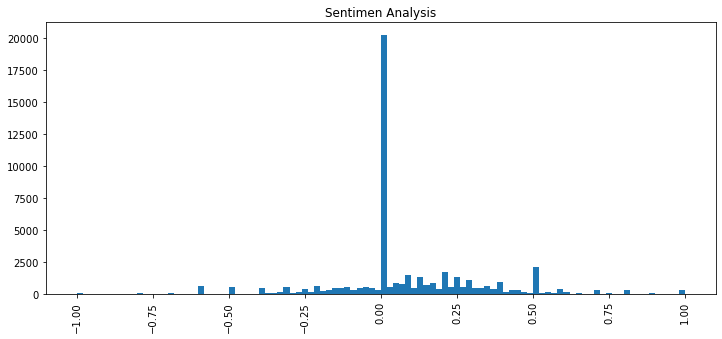

In [42]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
plt.title("Sentimen Analysis")
plt.hist(data.sentiment, bins=100);

In [43]:
# 0 nötr 1 pozitif 2 negatif
def sntmnt(score):
    if score>0.2:
        return 1
    elif score< (-0.2):
        return 2
    else:
        return 0

In [44]:
data["class"] = data["sentiment"].apply(sntmnt)

In [46]:
data.head()

,Text,sentiment,class
0,i forgot to play chatgpt i want you to write a...,0.050000,0
1,check out what fobizz dianaknodel brings to th...,0.068182,0
2,the first thing that individuals who write hom...,-0.050000,0
3,the unknown background of chatgpt cheap labort...,0.150000,0
4,latest comments article registered on januar...,0.316667,1


In [47]:
data["group"] = data["class"].replace({0:"neutral", 1:"positive", 2:"negative"})

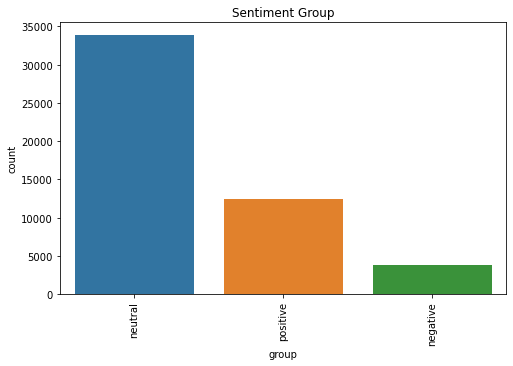

In [49]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot(x=data["group"])
plt.title("Sentiment Group")
plt.xticks(rotation=90);

## Predicting the Group of Next Tweet Category with Machine Learning

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer 
pr=PorterStemmer()
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()

In [53]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [54]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

In [55]:
x=data["Text"]
y=data["group"]

In [56]:
y.value_counts()

neutral     33852
positive    12366
negative     3783
Name: group, dtype: int64

In [57]:
x=vect.fit_transform(x)

### Machine Learning Classification

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.20)

#### Logistic Regression

In [61]:
l=LogisticRegression()
l.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [62]:
pred1=l.predict(x_test)

In [63]:
accuracy_score(pred1,y_test)

0.8652134786521348

#### Decision Tree Classification

In [64]:
d=DecisionTreeClassifier()

In [65]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
pred2 = d.predict(x_test)

In [67]:
accuracy_score(pred2,y_test)

0.8185181481851814